# Проект e-learning

### Задачи: 

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).

2. Выяви самый сложный и самый простой экзамен: найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью. 

3. По каждому предмету определи средний срок сдачи экзаменов (под сдачей понимаем последнее успешное прохождение экзамена студентом). 

4. Выяви самые популярные предметы (ТОП-3) по количеству регистраций на них. А также предметы с самым большим оттоком (ТОП-3). 

5. Используя pandas, в период с начала 2013 по конец 2014 выяви семестр с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов.  

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй адаптированные RFM-кластеры студентов, чтобы качественно оценить свою аудиторию. В адаптированной кластеризации можешь выбрать следующие метрики: R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. 

### Описсание данных:

assessments.csv — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с оценками, за которыми следует заключительный экзаменационный тест (экзамен).
* code_module — идентификационный код предмета.

* code_presentation — семестр (Идентификационный код).

* id_assessment — тест (Идентификационный номер ассессмента).

* assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).

* date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).

* weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

courses.csv — файл содержит список предметов по семестрам.
* code_module — предмет (идентификационный код).

* code_presentation — семестр (идентификационный код).

* module_presentation_length — продолжительность семестра в днях.

studentAssessment.csv — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
* id_assessment — тест (идентификационный номер).

* id_student — идентификационный номер студента.

* date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.

* is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).

* score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

studentRegistration.csv — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
* code_module — предмет (идентификационный код).

* code_presentation — семестр (идентификационный код)

* id_student — идентификационный номер студента.

* date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).

* date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

### Этапы работы:
1. Загрузка и предобработка данных
2. Подсчет студентов, которые успешно сдали только один курс
3. Выявление самого сложного и самого простого экзамена
4. Определение среднего срока сдачи экзаменов по каждому предмету
5. Определение топ-3 предмета по популярности предмета и топ-3 предмета с самым большим оттоком
6. Выявление семестра с самлй низкой завершаемостью курсов и самыми большими средними срокамисдачи курсов в период с 2013 по 2014 года
7. Проведение RFM-анализа
8. Вывод


<hr>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.stats as st
from datetime import timedelta


### 1.1 Загрузим и посмотрим информацию по курсам.

In [2]:
courses = pd.read_csv('courses.csv')
display(f"Количество строк и столбцов: {courses.shape}")

'Количество строк и столбцов: (22, 3)'

In [3]:
courses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 660.0+ bytes


In [4]:
display(f"Уникальные коды предметов: {courses.code_module.unique()}")
display(f"Уникальные коды семестров: {courses.code_presentation.unique()}")
display(f'Длительность модуля составляет от {courses.module_presentation_length.min()} до {courses.module_presentation_length.max()} дней')

"Уникальные коды предметов: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']"

"Уникальные коды семестров: ['2013J' '2014J' '2013B' '2014B']"

'Длительность модуля составляет от 234 до 269 дней'

По полученной информации видим, что есть 7 уникальных кодов предметов, а также 4 кода по семестрам.  
Длительность модуля составляет от 234 до 269 дней.

<hr>

### 1.2 Загрузим и посмотрим информацию по тестам

In [5]:
assessment = pd.read_csv('assessments.csv')
display(f"Количество строк и столбцов: {assessment.shape}")

'Количество строк и столбцов: (206, 6)'

In [6]:
display(assessment.info())
display(f"Уникальные коды предметов: {assessment.code_module.unique()}")
display(f"Уникальные коды семестров: {assessment.code_presentation.unique()}")
display(f"Количество уникальных тестов и экзаменов: {assessment.id_assessment.nunique()}")
display(f"Уникальные типы оценивания: {assessment.assessment_type.unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


None

"Уникальные коды предметов: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']"

"Уникальные коды семестров: ['2013J' '2014J' '2013B' '2014B']"

'Количество уникальных тестов и экзаменов: 206'

"Уникальные типы оценивания: ['TMA' 'Exam' 'CMA']"

По полученной информации видим, что в столбце date есть пропущенные значаения.  
Уникальные коды предметов и семестров совпадают с данными таблицы courses.  
Количество уникальных тестов и экзаменов: 206  
Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam)  

C:\Users\Настя\AppData\Local\Temp\ipykernel_21960\1229664248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=assessment, x="assessment_type", palette="viridis")


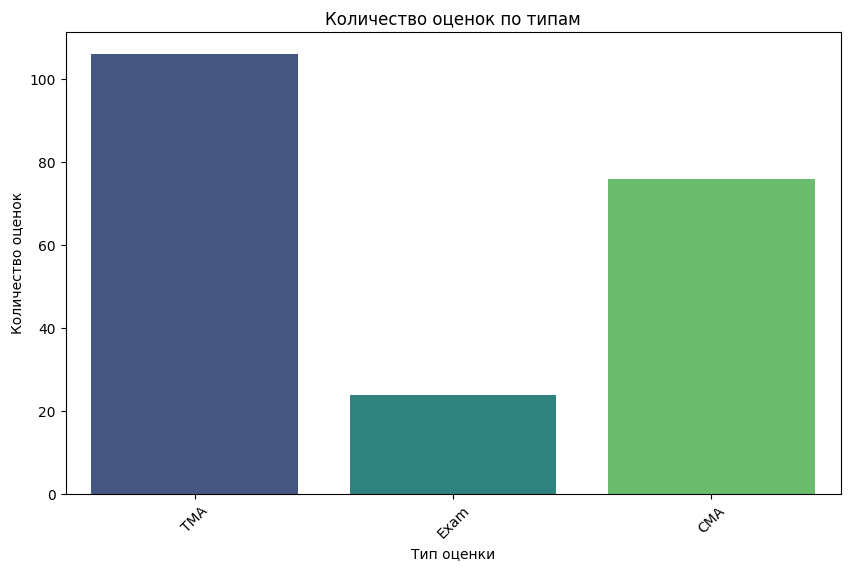

In [7]:
# Строим график
plt.figure(figsize=(10, 6))
sns.countplot(data=assessment, x="assessment_type", palette="viridis")
plt.title('Количество оценок по типам')
plt.xlabel('Тип оценки')
plt.ylabel('Количество оценок')
plt.xticks(rotation=45)
plt.show()


На данном графике видим, что незаполненые поля в столбце date находятся только у типа Exam

In [8]:
missing_values = assessment.isnull().sum()
print("Пропущенные значения в assessment:\n", missing_values)

Пропущенные значения в assessment:
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


<hr>

### 1.3 Создадим таблицу exams, где будут данные только об экзаменах, так как завершение курса подразумевает сдачу экзамена на 40 баллов.

In [9]:
# Создаем таблицу exams, отбирая только записи с типом 'Exam'
exams = assessment[assessment['assessment_type'] == 'Exam']

display(f"Количество строк и столбцов в exams: {exams.shape}")

display(exams.head())

'Количество строк и столбцов в exams: (24, 6)'

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0


In [10]:
# Проверяем на пропуски в столбце date таблице exams
missing_dates = exams['date'].isnull().sum()
display(f"Количество пропущенных значений в столбце date: {missing_dates}")
display("Строки с пропущенными значениями в столбце date:\n", exams[exams['date'].isnull()])


'Количество пропущенных значений в столбце date: 11'

'Строки с пропущенными значениями в столбце date:\n'

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


Проанализируем все экзамены и сравним дату экзамена из таблицы assessment с длительностью модуля из таблицы courses. Очевидно, что экзамен должен проводиться после завершения всех тестов и не позже даты окончания курса. После фильтрации данных мы можем подтвердить, что нет экзаменов, даты которых превышают продолжительность модуля. Чтобы избежать наличия пустых значений, заполним NaN значениями продолжительности курса и будем использовать таблицу tests как основную.

In [11]:
# Фильтруем экзамены и объединяем с данными о курсах
exam_data = assessment.query('assessment_type=="Exam"')\
                .merge(courses, how='left', on=['code_module', 'code_presentation'])\
                [['id_assessment', 'date', 'module_presentation_length']]

# Объединяем таблицы assessment и courses
tests = assessment.merge(courses, how='left', on=['code_module', 'code_presentation'])
# Заполняем пустые значения датами окончания модуля
tests['date'] = tests['date'].fillna(tests['module_presentation_length'])
# Проверяем на наличие пустых значений и выводим размеры таблицы
display(tests.isna().sum())      
display(tests.shape)              


code_module                   0
code_presentation             0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
module_presentation_length    0
dtype: int64

(206, 7)

Поскольку завершение курса определяется как сдача экзамена с результатом не менее 40 баллов, для удобства дальнейших расчетов создадим таблицу exams, в которой будут содержаться только данные об экзаменах.

In [12]:
# Отбираем записи из DataFrame tests, где тип оценки равен 'Exam', и сохраняем их в DataFrame exams
exams = tests.query('assessment_type == "Exam"')
display(f"Количество строк и столбцов в exams: {exams.shape}")
exams.head(1)


'Количество строк и столбцов в exams: (24, 7)'

,code_module,code_presentation,id_assessment,assessment_type,date,weight,module_presentation_length
5,AAA,2013J,1757,Exam,268.0,100.0,268


<hr>

### 1.4 Загрузим и посмотрим данные по результатам тестов студентов

In [13]:
students = pd.read_csv('studentAssessment.csv')
display(f"Количество строк и столбцов: {students.shape}")


'Количество строк и столбцов: (173912, 5)'

In [14]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


По полученным данным видим, что в столбце score есть незаполненные значения.

In [15]:
display(f"Количество уникальных тест: {students.id_assessment.nunique()}")
display(f"Количество студентов: {students.id_student.nunique()}")

'Количество уникальных тест: 188'

'Количество студентов: 23369'

Видим, что в таблице, содержащей результаты тестов студентов, представлены данные только о 188 тестах из 206.

<hr>

### 1.5 Загрузим и посмотрим данные о регистрации студентов

In [16]:
registration = pd.read_csv('studentRegistration.csv')
display(f"Количество строк и столбцов: {registration.shape}")

'Количество строк и столбцов: (32593, 5)'

In [17]:
display(registration.info())
display(f"Количество пропущенных значений в каждом столбце")
display(registration.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


None

'Количество пропущенных значений в каждом столбце'

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [18]:
display(f"Уникальные коды предметов: {registration.code_module.unique()}")
display(f"Уникальные коды семестров: {registration.code_presentation.unique()}")
display(f"Количество уникальных идентификаторов студентов: {registration.id_student.nunique()}")

"Уникальные коды предметов: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']"

"Уникальные коды семестров: ['2013J' '2014J' '2013B' '2014B']"

'Количество уникальных идентификаторов студентов: 28785'

Некоторые студенты не имеют даты регистрации и отмены регистрации. Проверим, сдавали ли они тесты. Если нет, удалим эти строки, так как сомневаемся в их регистрации. Если есть дата отмены, но нет даты регистрации, заполним поле даты регистрации нулем для сохранения данных для анализа отмен.

In [19]:
# Отбираем записи из DataFrame registration, где дата регистрации отсутствует, и сохраняем их в DataFrame date_reg
date_reg = registration[registration['date_registration'].isnull()]

# Отбираем записи из DataFrame date_reg, где дата аннулирования также отсутствует, и сбрасываем индексы
date_reg_unreg = date_reg[date_reg['date_unregistration'].isnull()].reset_index()

# Объединяем DataFrame date_reg_unreg с DataFrame students по столбцу 'id_student' с использованием внутреннего соединения
merged_data = date_reg_unreg.merge(students, how='inner', on='id_student')


In [20]:
# Получаем индексы записей, которые нужно удалить из DataFrame registration
index_to_drop = date_reg_unreg['index']

# Удаляем записи из DataFrame registration по индексам, полученным выше, и сбрасываем индексы
registration = registration.drop(index=index_to_drop).reset_index(drop=True)

# Заполняем пропущенные значения в столбце 'date_registration' нулями
registration['date_registration'] = registration['date_registration'].fillna(0)

# Выводим количество пропущенных значений в каждом столбце DataFrame registration для проверки
display(registration.isna().sum())


code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22515
dtype: int64

In [21]:
display(registration.info())
display(f"Количество пропущенных значений в каждом столбце")
display(registration.isna().sum())
display(f"Уникальные коды предметов: {registration.code_module.unique()}")
display(f"Уникальные коды семестров: {registration.code_presentation.unique()}")
display(f"Количество уникальных идентификаторов студентов: {registration.id_student.nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32587 entries, 0 to 32586
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32587 non-null  object 
 1   code_presentation    32587 non-null  object 
 2   id_student           32587 non-null  int64  
 3   date_registration    32587 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


None

'Количество пропущенных значений в каждом столбце'

code_module                0
code_presentation          0
id_student                 0
date_registration          0
date_unregistration    22515
dtype: int64

"Уникальные коды предметов: ['AAA' 'BBB' 'CCC' 'DDD' 'EEE' 'FFF' 'GGG']"

"Уникальные коды семестров: ['2013J' '2014J' '2013B' '2014B']"

'Количество уникальных идентификаторов студентов: 28780'

После проверки данных видим, что в исправленной таблице 32 587 строк, что меньше, чем было — 32 593. Количество столбцов осталось прежним — 5.  

Уникальных студентов стало 28 780, что меньше, чем было — 28 785.

<hr>

### 2. Подсчет студентов, которые успешно сдали только один курс. (Успешная сдача — это зачёт по курсу на экзамене)

In [22]:
# Оставляем только экзамены с успешными оценками (score >= 40)

# Фильтруем DataFrame assessment, чтобы оставить только записи с типом 'Exam'
exams = assessment[assessment['assessment_type'] == 'Exam']                              

# Отбираем записи из DataFrame students, где id_assessment содержится в exams и score больше или равен 40
successful_exams = students[
    (students['id_assessment'].isin(exams['id_assessment'])) &
    (students['score'] >= 40)
]                                             

# Считаем количество успешно сданных курсов для каждого студента
successful_courses = successful_exams.groupby('id_student').size().reset_index(name='num_courses')

# Отбираем студентов, успешно сдавших только один курс
students_with_one_course = successful_courses[successful_courses['num_courses'] == 1]

# Выводим количество студентов, успешно сдавших только один курс
display(f"Количество студентов, успешно сдавших только один курс: {len(students_with_one_course)}")


'Количество студентов, успешно сдавших только один курс: 3802'

По полученным данным видим, что у нас 3802 студента сдали успешно только один экзамен.

<hr>

### 3. Выявление самого сложного и самого простого экзамена

* *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен*

In [23]:
# Объединяем данные по экзаменам и результатам студентов, используя столбец 'id_assessment' как ключ
exam_results = pd.merge(exams, students, on='id_assessment')

# Расчет завершаемости для каждого экзамена
exam_completion = exam_results.groupby(['code_module', 'code_presentation', 'id_assessment'])\
                              .agg(
                                  total_students=('id_student', 'nunique'),   # Общее количество студентов, сдавших экзамен
                                  successful_students=('score', lambda x: (x >= 40).sum())  # Количество студентов, успешно сдавших экзамен
                              ).reset_index()  # Сбрасываем индексы для удобства работы с DataFrame

# Расчет завершаемости: успешно сдавших студентов / общее количество студентов
exam_completion['completion_rate'] = exam_completion['successful_students'] / exam_completion['total_students']

# Определение самого сложного экзамена (с минимальной завершаемостью)
hardest_exam = exam_completion.loc[exam_completion['completion_rate'].idxmin()]

# Определение самого простого экзамена (с максимальной завершаемостью)
easiest_exam = exam_completion.loc[exam_completion['completion_rate'].idxmax()]

# Вывод результатов о самом сложном экзамене
display(f"Самый сложный курс: {hardest_exam['code_module']} в семестре {hardest_exam['code_presentation']}")
display(f"Самый сложный экзамен под id: {hardest_exam['id_assessment']}")
display(f"Завершаемость курса: {hardest_exam['completion_rate']:.2%}")

# Вывод результатов о самом простом экзамене
display(f"Самый простой курс: {easiest_exam['code_module']} в семестре {easiest_exam['code_presentation']}")
display(f"Самый простой экзамен под id: {easiest_exam['id_assessment']}")
display(f"Завершаемость курса: {easiest_exam['completion_rate']:.2%}")


'Самый сложный курс: DDD в семестре 2013B'

'Самый сложный экзамен под id: 25340'

'Завершаемость курса: 83.72%'

'Самый простой курс: DDD в семестре 2014B'

'Самый простой экзамен под id: 25361'

'Завершаемость курса: 92.56%'

<hr> 

### 4. Определение среднего срока сдачи экзаменов по каждому предмету

In [24]:
# Рассчитываем средний срок сдачи экзаменов для каждого предмета
average_exam_completion = (
    successful_exams.sort_values(by='date_submitted')
    .drop_duplicates(subset=['id_student', 'id_assessment'], keep='last')  # Удаляем дубликаты, оставляя последние даты сдачи экзаменов для каждого студента
    .merge(exams[['id_assessment', 'code_module']], on='id_assessment')  # Объединяем с DataFrame exams, чтобы получить код предмета
    .groupby('code_module', as_index=False)  # Группируем данные по коду предмета
    .agg({'date_submitted': 'mean'})  # Рассчитываем среднюю дату сдачи экзаменов
    .round(0)  # Округляем результаты до целого числа
    .rename(columns={'date_submitted': 'Средний срок сдачи', 'code_module': 'Код предмета'})  # Переименовываем столбцы для удобства
)

# Выводим результат
display(average_exam_completion)


,Код предмета,Средний срок сдачи
0,CCC,239.0
1,DDD,238.0


<hr> 

 ### 5. Определение топ-3 предмета по популярности. Определение топ-3 предмета с самым большим оттоком.

Мы можем заметить, что предметы с наибольшим количеством регистраций (BBB, FFF, DDD) также демонстрируют самый высокий отток студентов. Это может быть связано с тем, что эти дисциплины очень популярны, но при этом сложны для усвоения, или с другими факторами, которые способствуют уходу студентов.

Интересно, что в ТОП-3 по популярности и ТОП-3 по оттоку входят одни и те же предметы (BBB, FFF, DDD). Это свидетельствует о том, что эти дисциплины являются как самыми привлекательными, так и самыми проблемными с точки зрения удержания студентов.

Высокий отток требует тщательного анализа и разработки мер, направленных на улучшение ситуации.

In [25]:
# Рассчитываем количество регистраций для каждого курса
registrations = registration.groupby('code_module')['id_student'].nunique().reset_index(name='registrations')

# Определяем отток только тех студентов, которые после отмены регистрации не регистрировались повторно
# Сначала получим список студентов, которые отменили регистрацию
dropout_students = registration[registration['date_unregistration'].notna()]['id_student'].unique()

# Теперь проверим, сколько из этих студентов больше не зарегистрированы на курсы
dropouts = registration[registration['id_student'].isin(dropout_students) & 
                        (registration['date_unregistration'].notna())].groupby('code_module')['id_student'].nunique().reset_index(name='dropouts')

# Объединяем данные по регистрациям и оттоку, заполняя пропуски нулями
course_popularity = registrations.merge(dropouts, on='code_module', how='left').fillna(0)

# Рассчитываем процент оттока
course_popularity['dropout_rate'] = course_popularity['dropouts'] / course_popularity['registrations'] * 100

# Находим самые популярные предметы (с наибольшим количеством регистраций)
most_popular_courses = course_popularity.nlargest(3, 'registrations')

# Находим предметы с самым высоким процентом оттока
highest_dropout_courses = course_popularity.nlargest(3, 'dropout_rate')

# Выводим самые популярные предметы
display("Самые популярные предметы:")
display(most_popular_courses)

# Выводим предметы с самым большим оттоком
display(f"Предметы с самым большим оттоком:")
display(highest_dropout_courses)

'Самые популярные предметы:'

,code_module,registrations,dropouts,dropout_rate
1,BBB,7691,2314,30.087115
5,FFF,7396,2249,30.408329
3,DDD,5846,2065,35.323298


'Предметы с самым большим оттоком:'

,code_module,registrations,dropouts,dropout_rate
2,CCC,4250,1858,43.717647
3,DDD,5846,2065,35.323298
5,FFF,7396,2249,30.408329


<hr> 

### 6. Выявление семестра с самой низкой завершаемостью курсов и самыми длинными средними сроками сдачи курсов в период с начала 2013 и конца 2014 года

Завершаемость.  
Поскольку не у всех предметов есть экзамены, индикатора успешно пройденного курса (выявлено выше), для курсов без данных об экзаменах мы будем подсчитывать общую оценку всех тестов и считать курс успешно пройденным при общей оценке выше 40. Общая оценка высчитывается как сумма всех баллов умноженная на вес теста и с условием, что решены все тесты курса

In [26]:
assessment['code_course'] = assessment['code_module'] + '_' + assessment['code_presentation']
courses['code_course'] = courses['code_module'] + '_' + courses['code_presentation']

In [27]:
# Объединить таблицы studentAssessment и assessments по полю id_assessment
#Подсчет всех студентов по семестрам
all_count = students.merge(assessment, on='id_assessment')\
                    .groupby(['code_presentation'], as_index=False)\
                    .agg(all_count = ('id_student', 'nunique'))
all_count.head()

,code_presentation,all_count
0,2013B,3803
1,2013J,7098
2,2014B,5748
3,2014J,8613


In [28]:
# Подсчет студентов, сдавших курс успешно
# Фильтрация по курсам, где есть экзамен; типу теста - экзамен и ученикам, чья оценка выше или равна 40

with_exam = students.merge(assessment, on = 'id_assessment')\
                .query("code_course in ('DDD_2013B','CCC_2014J','DDD_2014J','CCC_2014B','DDD_2013J','DDD_2014B')")\
                .query("assessment_type == 'Exam'")\
                .query("score >= 40")
with_exam

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,code_course
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52928,24290,560494,230,0,92.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
...,...,...,...,...,...,...,...,...,...,...,...
95978,25368,652617,243,0,56.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J


In [29]:
# Объединим таблицы students и assessment по полю id_assessment
# Отфильтруем по курсам, где нет экзамена
# Сделаем группировку по студентам и курсам для подсчета суммы весов теста и выбор только тех, у кого пройдены все (суммированный вес равен 100)
# Объединим с таблицами students и assessment и удалим столбец с суммированным весами, чтобы избежать дубликата названия столбца и за отсутствием необходимости в нем далее
without_exam = students.merge(assessment, on = 'id_assessment')\
                .query("code_course not in ('DDD_2013B','CCC_2014J','DDD_2014J','CCC_2014B','DDD_2013J','DDD_2014B')")\
                .groupby(['id_student','code_course'], as_index = False)\
                .agg({'weight':'sum'})\
                .query("weight == '100'")\
                .drop(columns = 'weight')\
                .merge(students.merge(assessment, on = 'id_assessment'), on = ['id_student','code_course'])

# Подсчетаем столбец с оценкой в соответствии с весами + приведем вес к десятичному виду дроби
without_exam['weight_score'] = without_exam['score'] * without_exam['weight'] / 100

# Сделаем группировку по студентам, курсам и семестру (для использования в итоговых подсчетах) и подсчитаем общую оценку
# Отфильтруем тех студентов, чья оценка выше или равна 40
without_exam = without_exam\
                    .groupby(['id_student','code_course','code_presentation'], as_index = False)\
                    .agg({'weight_score':'sum'})\
                    .query("weight_score >= 40")
without_exam.head()

,id_student,code_course,code_presentation,weight_score


In [30]:
# Сделаем подсчет завершаемости.
# Объединить таблицы, полученные выше по полю code_course

success_count = pd.concat([with_exam[['id_student','code_presentation']], without_exam[['id_student','code_presentation']]])\
                        .groupby(['code_presentation'], as_index=False)\
                        .agg(success_count = ('id_student', 'nunique'))
success_count.head(2)

# Создание поля завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен
df_all = all_count.merge(success_count, on = 'code_presentation')
df_all['percent'] = df_all.success_count / df_all.all_count
df_all.sort_values('percent')

,code_presentation,all_count,success_count,percent
1,2013J,7098,878,0.123697
0,2013B,3803,504,0.132527
2,2014B,5748,1140,0.198330
3,2014J,8613,1814,0.210612


Семестр с самой низкой завершаемостью курсов 2013J

In [31]:
# Для курсов с экзаменами: Объединить таблицы students и assessment по полю id_assessment
# Сделаем вильтрацию по курсам, где есть экзамен; типу теста - экзамен и ученикам, чья оценка выше или равна 40
with_exam = students.merge(assessment, on = 'id_assessment')\
                .query("code_course in ('DDD_2013B','CCC_2014J','DDD_2014J','CCC_2014B','DDD_2013J','DDD_2014B')")\
                .query("assessment_type == 'Exam'")\
                .query("score >= 40")
with_exam

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,code_course
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
52928,24290,560494,230,0,92.0,CCC,2014B,Exam,NaN,100.0,CCC_2014B
...,...,...,...,...,...,...,...,...,...,...,...
95978,25368,652617,243,0,56.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,DDD_2014J


In [32]:
# Для курсов без экзаменов: объединим таблицы students и assessment по полю id_assessment
# Отфильтруем по курсам, где нет экзамена
# Сделаем группировку по студентам и курсам для подсчета суммы весов теста и выбор только тех, у кого пройдены все (суммированный вес равен 100)
# Объединим с таблицами students и assessment и удаление столбца с суммированным весами, чтобы избежать дубликата названия столбца и за отсутствием необходимости в нем далее

without_exam = students.merge(assessment, on = 'id_assessment')\
                .query("code_course not in ('DDD_2013B','CCC_2014J','DDD_2014J','CCC_2014B','DDD_2013J','DDD_2014B')")\
                .groupby(['id_student','code_course'], as_index = False)\
                .agg({'weight':'sum'})\
                .query("weight == '100'")\
                .drop(columns = 'weight')\
                .merge(students.merge(assessment, on = 'id_assessment'), on = ['id_student','code_course'])

# Подсчет столбца с оценкой в соответствии с весами + приводем веса к десятичному виду дроби
without_exam['weight_score'] = without_exam['score'] * without_exam['weight'] / 100

# Группировка по студентам, курсам и суммируем баллы скорректированные по весам 
# Фильтруем тех студентов, чья оценка выше или равна 40
without_exam = without_exam\
                    .groupby(['id_student','code_course'], as_index = False)\
                    .agg({'weight_score':'sum'})\
                    .query("weight_score >= 40")
# Снова объединеняем с таблицами studentAssessment и assessments
# Группировка по студентам, курсам и семестру (для использования в итоговых подсчетах) и подсчитываем средние сроки сдачи тестов для каждого студента
without_exam = without_exam\
                .merge(students.merge(assessment, on = 'id_assessment'), on = ['id_student','code_course'])\
                .groupby(['id_student','code_course','code_presentation'], as_index = False)\
                .agg({'date_submitted':'median'})

without_exam

,id_student,code_course,code_presentation,date_submitted


In [33]:
# Объединим два полученных датафрейма, оставляя только стобцы с семестром и сроком сдачи
# Сгруппируем по семестру и подсчитываем средний срок сдачи для каждого семестра
pd.concat([with_exam[['date_submitted','code_presentation']], without_exam[['date_submitted','code_presentation']]])\
            .groupby('code_presentation', as_index=False)\
            .agg({'date_submitted':'median'})\
            .sort_values('date_submitted', ascending = False)

,code_presentation,date_submitted
3,2014J,244.0
1,2013J,241.0
2,2014B,234.0
0,2013B,230.0


Семестр с самыми долгими средними сроками сдачи курсов 2014J

### 7. Проведение RFM-анализа

Для проведения RFM-анализа необходимо определить, какие данные будут использоваться. В данном контексте выделяются следующие ключевые моменты:

1. Общее количество студентов:
    Всего зарегистрированных уникальных студентов: **28,755**.

2. У нас неполные данные:
   Доступна информация о сдаче экзаменов только по предметам **CCC** и **DDD**.

3. Подходы к RFM-анализу:
   Первый подход:
    Предположить, что средняя оценка за тесты примерно равна средней оценке за экзамены.
    В этом случае следует анализировать результаты сдачи тестов всех студентов.
    Цель: выделить конкретные группы студентов с высокими показателями, следует использовать
     
   Второй подход:
    Рассматривать результаты по предметам **CCC** и **DDD** как репрезентативные для всей совокупности студентов.
    Этот вариант более подходит, если цель состоит в разделении студентов на группы и понимании структуры потоков.
     Цель:необходимо получить общее представление о всех потоках студентов, лучше подойдет

4. Анализ зависимости:
   Первым шагом будет исследование связи между оценками за тесты и оценками за экзамены, используя данные только по предметам **CCC** и **DDD**, так как отсутствует информация о других предметах.
   

In [34]:
# Объединяем таблицы tests и students по полю 'id_assessment' с использованием внутреннего соединения
stat = tests.merge(students, how='inner', on='id_assessment')

# Фильтруем данные по коду модуля и оценке, создаем новый DataFrame
cd = tests.merge(students, how='inner', on='id_assessment')\
          .query('code_module=="CCC" or code_module=="DDD"')

# Получаем средние оценки для тестов (не экзаменов) по каждому студенту
H1 = stat.query('assessment_type!="Exam" and (code_module=="CCC" or code_module=="DDD")')\
         .groupby('id_student', as_index=False)\
         .agg({'score': 'mean'})

# Получаем максимальные оценки для экзаменов по каждому студенту
H2 = stat.query('assessment_type=="Exam" and (code_module=="CCC" or code_module=="DDD")')\
         .groupby('id_student', as_index=False)\
         .agg({'score': 'max'})

# ООбъединяем 2 DataFrame H1 и H2 по 'id_student', переименовываем колонки
H = H1.merge(H2, how='inner', on='id_student')\
      .rename(columns={'score_x': 'tests', 'score_y': 'exams'})

# Фильтруем студентов, у которых оценки тестов >= 40 и экзаменов < 40
filtered_results = H.query("tests>=40 and exams<40")

print(f'Количество студентов с тестами >= 40 и экзаменами < 40: {filtered_results.shape[0]}')

Количество студентов с тестами >= 40 и экзаменами < 40: 507


C:\Users\Настя\AppData\Local\Temp\ipykernel_21960\807328467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(H['tests'], label='tests')  # График распределения оценок тестов
C:\Users\Настя\AppData\Local\Temp\ipykernel_21960\807328467.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distpl

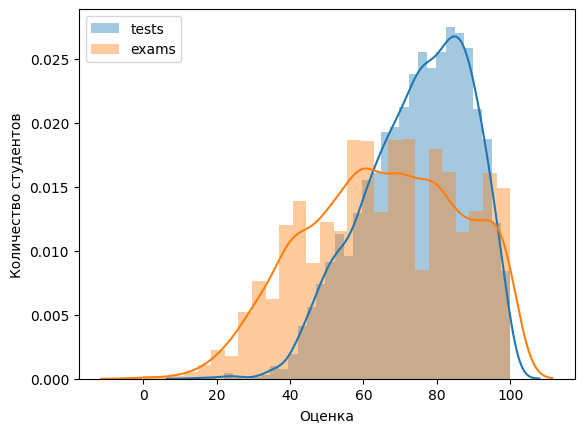

In [35]:
# Строим график распределения оценок тестов и экзаменов
ax = sns.distplot(H['tests'], label='tests')  # График распределения оценок тестов
ax = sns.distplot(H['exams'], label='exams')  # График распределения оценок экзаменов
ax.set_xlabel('Оценка')  # Подпись оси X
ax.set_ylabel('Количество студентов')  # Подпись оси Y
plt.legend()  # Отображение легенды
plt.show()  # Показать график


In [36]:
# Рассчитываем среднее значение тестов и округляется до двух знаков
a = H.tests.mean().round(2)

# Рассчитываем стандартное отклонение тестов и округляется до двух знаков
b = H.tests.std().round(2)

# Рассчитываем стандартная ошибка выборки тестов и округляется до двух знаков
c = H.tests.sem().round(2)

# Определяем количество значений в выборке
d = H.shape[0]

# Рассчитываем доверительный интервал среднего тестов
e = st.t.interval(confidence=0.99, df=d-1, loc=a, scale=c)


display(f'В выборке с результатами тестов {d} значений, среднее равняется {a}, '
      f'стандартное отклонение {b}, стандартная ошибка выборки {c}. '
      f'Доверительный интервал среднего равняется {e}')

# Рассчитываем среднее значение экзаменов и округляется до двух знаков
f = H.exams.mean().round(2)

# Рассчитываем стандартное отклонение экзаменов и округляется до двух знаков
g = H.exams.std().round(2)

# Рассчитываем стандартная ошибка выборки экзаменов и округляется до двух знаков
k = H.exams.sem().round(2)

# Рассчитываем доверительный интервал среднего экзаменов
l = st.t.interval(confidence=0.99, df=d-1, loc=f, scale=k)  


display(f'В выборке с результатами экзаменов среднее равняется {f}, '
      f'стандартное отклонение {g}, стандартная ошибка выборки {k}. '
      f'Доверительный интервал среднего равняется {l}')


'В выборке с результатами тестов 4630 значений, среднее равняется 74.86, стандартное отклонение 14.32, стандартная ошибка выборки 0.21. Доверительный интервал среднего равняется (np.float64(74.3188527147114), np.float64(75.4011472852886))'

'В выборке с результатами экзаменов среднее равняется 65.6, стандартное отклонение 20.66, стандартная ошибка выборки 0.3. Доверительный интервал среднего равняется (np.float64(64.82693244958772), np.float64(66.37306755041227))'

ВЫВОД: 

В таблице, сравнивающей результаты тестов и экзаменов, было зафиксировано 4,630 студентов. Из них 507 студентов, имея среднюю оценку по тестам выше 40 баллов, получили оценку по экзамену ниже 40 баллов. Это составляет 11% от общего числа студентов в выборке.

Графическое представление данных также показывает значительное различие в распределении и величине оценок: экзамены представлены блекло-оранжевым цветом, а тесты — синим. Среднее значение по тестам превышает среднее значение по экзаменам на 9,26 балла.

Эти результаты указывают на высокую вероятность того, что студенты, не сдавшие экзамен или не способные его сдать, могут быть ошибочно классифицированы как сдавшие. На основе вышеуказанных показателей я отказываюсь от гипотезы о том, что оценки за тесты могут быть связаны с оценками за экзамены. Следовательно, заменять одни данные другими в RFM-анализе нецелесообразно.

<hr>

Теперь проверим вторую гипотезу: выборка по предметам **DDD** и **CCC** является репрезентативной, и ее результаты можно распространить на всю совокупность. Для этого сделаю следующее:

Используем только данные по тестам. 
Генеральная совокупность представлена в таблице **stat**, а выборка (по предметам CCC и DDD) — в таблице **cd**.


<Axes: xlabel='score', ylabel='Count'>

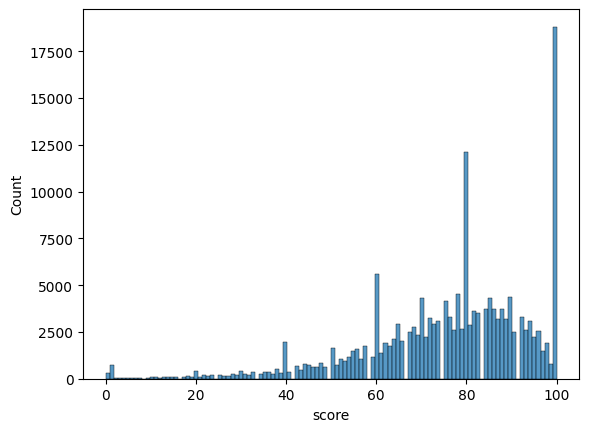

In [37]:
sns.histplot(data=stat, x="score")

In [38]:
# Рассчитываем среднее значение для всех предметов и округляется до двух знаков
a = stat.score.mean().round(2)

# Рассчитываем стандартное отклонение для всех предметов и округляется до двух знаков
b = stat.score.std().round(2)

# Рассчитываем стандартная ошибка выборки для всех предметов и округляется до двух знаков
c = stat.score.sem().round(2)

# Определяем количество значений в выборке по всем предметам
d = len(stat)

# Рассчитываем доверительный интервал среднего для всех предметов
e = st.t.interval(confidence=0.99, df=d-1, loc=a, scale=c)


display(f'В выборке по всем предметам {d} значений, среднее равняется {a}, '
      f'стандартное отклонение {b}, стандартная ошибка выборки {c}. '
      f'Доверительный интервал среднего равняется {e}')

# Рассчитываем среднее значение для предметов CD и округляется до двух знаков
f = cd.score.mean().round(2)

# Рассчитываем стандартное отклонение для предметов CD и округляется до двух знаков
g = cd.score.std().round(2)

# Рассчитываем стандартная ошибка выборки для предметов CD и округляется до двух знаков
k = cd.score.sem().round(2)

# Определяем количество значений в выборке по предметам CD
m = len(cd)

# Рассчитываем доверительный интервал среднего для предметов CD
l = st.t.interval(confidence=0.99, df=m-1, loc=f, scale=k) 


display(f'В выборке по предметам CD {m} значений, среднее равняется {f},'
      f'стандартное отклонение {g}, стандартная ошибка выборки {k}.]'
      f'Доверительный интервал среднего равняется {l}')


'В выборке по всем предметам 173912 значений, среднее равняется 75.8, стандартное отклонение 18.8, стандартная ошибка выборки 0.05. Доверительный интервал среднего равняется (np.float64(75.6712071212839), np.float64(75.9287928787161))'

'В выборке по предметам CD 49804 значений, среднее равняется 71.3,стандартное отклонение 21.11, стандартная ошибка выборки 0.09.]Доверительный интервал среднего равняется (np.float64(71.06816647756825), np.float64(71.53183352243174))'


Вывод:
При построении графиков можно заметить, что распределение оценок близко к нормальному. Однако имеются значительные выбросы на значениях, кратных **20**, что может указывать на вмешательство человека в распределение оценок.  
Оценив статистические показатели, обнажили, что среднее значение в выборке ниже, чем среднее по общей совокупности, на **5,48**.  
Это свидетельствует о том, что студенты, не сдавшие экзамен, не будут ошибочно учтены как сдавшие.  
В целом показатели более сопоставимы, чем в первом варианте.  

Исходя из этого, нужно сосредоточиться на исследовании выборки по предметам **CCC** и **DDD**.  
Таким образом, целью RFM-анализа станет выявление структуры студентов по группам и формирование списка лучших студентов по модулям **CCC** и **DDD**.

<hr>

**Теперь приступим к проведению самого RFM-анализа**

В качестве показателя **Monetary** возьмем среднее количество баллов, получаемое за экзамен.  
Для расчета **M** (среднего количества баллов за экзамен) возьмем максимальный балл, полученный каждым студентом при сдаче экзамена.  
Добавлено условие, которое исключает перезачеты. Однако это условие не обязательно, так как по экзаменам перезачетов не наблюдается (это было проверено).

Далее, используя показатель **M**, найдем квинтили и присвоим каждой оценке соответствующий ранг в зависимости от принадлежности к определенному квинтилю.   
Поскольку по показателю **M** чем выше значение, тем лучше, квинтили будут определены следующим образом:  

Первый квинтиль (0-20%): от 0 до 47 баллов — оценка 1  
Второй квинтиль (21-40%): от 48 до 60 баллов — оценка 2   
Третий квинтиль (41-60%): от 61 до 73 баллов — оценка 3  
Четвертый квинтиль (61-80%): от 74 до 86 баллов — оценка 4    
Пятый квинтиль (81-100%): от 87 до 100 баллов — оценка 5 

In [39]:
# Объединяем данные студентов и экзаменов по идентификатору оценки с фильтрацией по статусу 'is_banked'
M = students.merge(exams, how='inner', on='id_assessment').query('is_banked==0')

# Группируем  данные по идентификатору студента, чтобы получить максимальный балл для каждого студента
scores = M.groupby('id_student', as_index=False).agg({'score': 'max'})

print(f'Получены максимальные баллы для {len(scores)} студентов.')


Получены максимальные баллы для 4633 студентов.


In [40]:
# Рассчитываем квантели для столбца 'score' и сохраняются в словаре
quintilesM = scores['score'].quantile([.2, .4, .6, .8]).to_dict()

# Определяем функция для классификации оценок на основе квантилей
def m_score(x):
    if x <= quintilesM[.2]:
        return 1  # 1-я группа (наименьшие оценки)
    elif x <= quintilesM[.4]:
        return 2  # 2-я группа
    elif x <= quintilesM[.6]:
        return 3  # 3-я группа
    elif x <= quintilesM[.8]:
        return 4  # 4-я группа
    else:
        return 5  # 5-я группа (наивысшие оценки)

# Применяем функция m_score к столбцу 'score' для создания нового столбца 'M'
scores['M'] = scores['score'].apply(lambda x: m_score(x))


print(f'Количество студентов в каждой группе:\n{scores["M"].value_counts()}')


Количество студентов в каждой группе:
M
1    1000
3     963
2     934
5     908
4     828
Name: count, dtype: int64


В качестве **R-оценки** возьмем количество дней просрочки сдачи зачетов. Этот показатель является более общим, так как отражает не только внешнюю дисциплину (как студент ведет себя под контролем), но и внутреннюю (насколько он способен выполнять задачи в срок без непосредственного контроля).

 Для каждого студента вычмслим количество дней опозданий по срокам сдачи тестов и экзаменов, а затем суммируем эти дни.

 Аналогично показателю **M**, рассчитаем квинтили и присвоим оценки по следующей шкале:  

Первый квинтиль (0-20%): без опозданий — оценка 5    
Второй квинтиль (21-40%): общие опоздания до 1 дня — оценка 4    
Третий квинтиль (41-60%): общие опоздания от 2 до 8 дней — оценка 3    
Четвертый квинтиль (61-80%): общие опоздания от 9 до 18 дней — оценка 2    
Пятый квинтиль (81-100%): общие опоздания свыше 19 дней — оценка 1 



In [41]:
# Объединяем таблицы tests и students для получения информации о студентах и тестах
passing = tests.merge(students, how='right', on='id_assessment').query('is_banked==0')

# Вычисляем задержки между датой сдачи и датой теста
passing = passing.assign(delay=passing.date_submitted - passing.date)

# Заменяем отрицательные значения задержки на 0
passing['delay'] = passing['delay'].apply(lambda x: max(x, 0))

# Группируем данные по студентам и суммируем задержки
passing = passing.groupby('id_student', as_index=False).agg({'delay': 'sum'})

# Вычисляем квантили для задержки
quintilesR = passing['delay'].quantile([.2, .4, .6, .8]).to_dict()

# Функция для вычисления R-оценки на основе задержки
def r_score(x):
    if x <= quintilesR[.2]:
        return 5
    elif x <= quintilesR[.4]:
        return 4
    elif x <= quintilesR[.6]:
        return 3
    elif x <= quintilesR[.8]:
        return 2
    else:
        return 1

# Применяем функцию r_score для вычисления R-оценки
passing['R'] = passing['delay'].apply(lambda x: r_score(x))

print(passing[['id_student', 'delay', 'R']])


       id_student  delay  R
0            6516    0.0  5
1            8462    4.0  3
2           11391    0.0  5
3           23629   24.0  1
4           23698   13.0  2
...           ...    ... ..
23304     2698251    0.0  5
23305     2698257   10.0  2
23306     2698535   18.0  2
23307     2698577    0.0  5
23308     2698588    1.0  4

[23309 rows x 3 columns]


Показатель **F** будет учитывать повторяемость регистраций. В качестве **F** возьмем количество регистраций на различные курсы одним и тем же студентом. Это отражает уровень настойчивости в овладении знаниями (при повторной регистрации на один и тот же курс) или стремление к развитию (при регистрации на разные курсы).

Количество уникальных значений регистраций равно четырем, поэтому рассчитывать квинтили и создавать пятибалльную систему оценок нецелесообразно.  
Все значения ноль (где количество отмены регистрации равно количеству регистраций) будут исключены.  
После исключения значений ноль остаются три значения, которым присваиваются следующие оценки:

Если количество регистраций на один больше, чем отмен, (студент обучался до конца на одном курсе) — оценка 1
Если количество регистраций на два больше, чем отмен (студент обучался до конца на двух курсах) — оценка 2
Если количество регистраций на три больше, чем отмен (студент обучался до конца на трех курсах) — оценка 3

-Несмотря на то что оценка соответствует значению **persist**, выделим ее в отдельный столбец для ясности и удобства анализа.

Теперь перейдем к расчётам по показателю **F** и присвоим соответствующие оценки оставшимся значениям.

In [42]:
# Удаляем строки с пропущенными значениями в столбце date_registration
registration = registration.dropna(subset=['date_registration'])

# Группируем данные по идентификатору студента и считаем количество регистраций и аннулирований
repeat = registration.groupby('id_student', as_index=False)\
                     .agg({'date_registration': 'count', 'date_unregistration': 'count'})

# Вычисляем разницу между регистрациями и аннулированием
repeat['persist'] = repeat.date_registration - repeat.date_unregistration

# Фильтруем студентов с положительным значением persist
repeat = repeat.query('persist > 0')

# Функция для вычисления F-оценки на основе значения persist
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

# Применяем функцию f_score для вычисления F-оценки
repeat['F'] = repeat['persist'].apply(lambda x: f_score(x))

# Выводим результаты
print(repeat[['id_student', 'date_registration', 'date_unregistration', 'persist', 'F']])


       id_student  date_registration  date_unregistration  persist  F
1            6516                  1                    0        1  1
3           11391                  1                    0        1  1
4           23629                  1                    0        1  1
6           23698                  1                    0        1  1
7           23798                  1                    0        1  1
...           ...                ...                  ...      ... ..
28772     2698251                  1                    0        1  1
28773     2698257                  1                    0        1  1
28774     2698535                  2                    1        1  1
28775     2698577                  1                    0        1  1
28776     2698588                  1                    0        1  1

[21185 rows x 5 columns]


Теперь объединим таблицы с показателями **RFM** и присвоенными оценками, а затем ввыведем общую оценку в виде трехзначного числа. 
Формируем общую оценку, где:  
Число сотен соответствует оценке **R**  
Число десятков соответствует оценке **F**  
Число единиц соответствует оценке **M**

In [43]:
# Объединяем данные о метриках R, F и M в один DataFrame
rfm = scores.merge(passing, how='inner', on='id_student')  # Объединение с метрикой R
rfm = rfm.merge(repeat, how='inner', on='id_student')      # Объединение с метрикой F

# Создаем RFM_score, конкатенируя значения R, F и M
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

# Получаем количество уникальных RFM_score
unique_rfm_scores = rfm.RFM_score.nunique()

# Выводим количество уникальных RFM_score
print(f'Количество уникальных RFM_score: {unique_rfm_scores}')


Количество уникальных RFM_score: 47


В результате этого объединения получается **47** различных групп из общего числа **4,632** отобранных студентов.

Теперь можно проанализировать, какие группы студентов были сформированы на основе полученных RFM-оценок.

<hr>

Ранжирование завершено, и теперь можно отбирать конкретных студентов, которые могут быть рекомендованы работодателям. Можно взять следующие критерии для отбора:

**Показатель M**: должен быть равен **5** (самые успешные результаты по экзаменам)  
**Показатель R**: должен быть больше **3** (студенты, которые почти не задерживали сдачу зачетов и экзаменов, в сумме не более одного дня)  
**Показатель F**: используется только для характеристики групп, поэтому будет применяться как дополнительный фильтр  

In [44]:
# Фильтруем данные, выбирая студентов с RFM_score, где M==5, F>0 и R>3,
# и группируем результаты по RFM_score, подсчитывая количество записей в каждой группе
grouped_rfm = rfm.query('M==5 and F>0 and R>3').groupby('RFM_score', as_index=False).size()

# Выводим результаты группировки
print(f"Количество студентов по RFM_score, где M==5, F>0 и R>3:\n{grouped_rfm}")



Количество студентов по RFM_score, где M==5, F>0 и R>3:
  RFM_score  size
0       415    10
1       515   225


In [45]:
# Фильтруем записи для RFM_score равного "515" или "415"
specific_rfm_scores = rfm.query('RFM_score=="515" or RFM_score=="415"')

# Выводим результаты для конкретных RFM_score
print(f"\nЗаписи для RFM_score '515' или '415':\n{specific_rfm_scores}")




Записи для RFM_score '515' или '415':
      id_student  score  M  delay  R  date_registration  date_unregistration  \
18         40184  100.0  5    0.0  5                  1                    0   
29         50476   87.0  5    0.0  5                  1                    0   
83         88490   96.0  5    0.0  5                  1                    0   
115       117281   87.0  5    0.0  5                  1                    0   
128       127580   91.0  5    0.0  5                  1                    0   
...          ...    ... ..    ... ..                ...                  ...   
4481     2516939   87.0  5    0.0  5                  1                    0   
4518     2569416   91.0  5    0.0  5                  1                    0   
4523     2581779   87.0  5    0.0  5                  1                    0   
4535     2595730   89.0  5    0.0  5                  2                    1   
4588     2659530   87.0  5    0.0  5                  1                    0   



Теперь разберем всю совокупность студентов на группы по показателям **R** и **M**. 

**Показатель R** характеризует дисциплину и ответственность студента.
**Показатель M** отражает уровень усвоения материала.
Выделим **семь групп** на основе рангов по этим показателям и присвоим им условные имена.

Названия сегментов будут добавлены в таблицу, чтобы облегчить идентификацию каждой группы студентов.


Создадим график, на котором будет видно распределение студентов по группам и средний балл за экзамен.
График поможет визуализировать, как распределяются студенты по группам в зависимости от их показателей **R** и **M**.



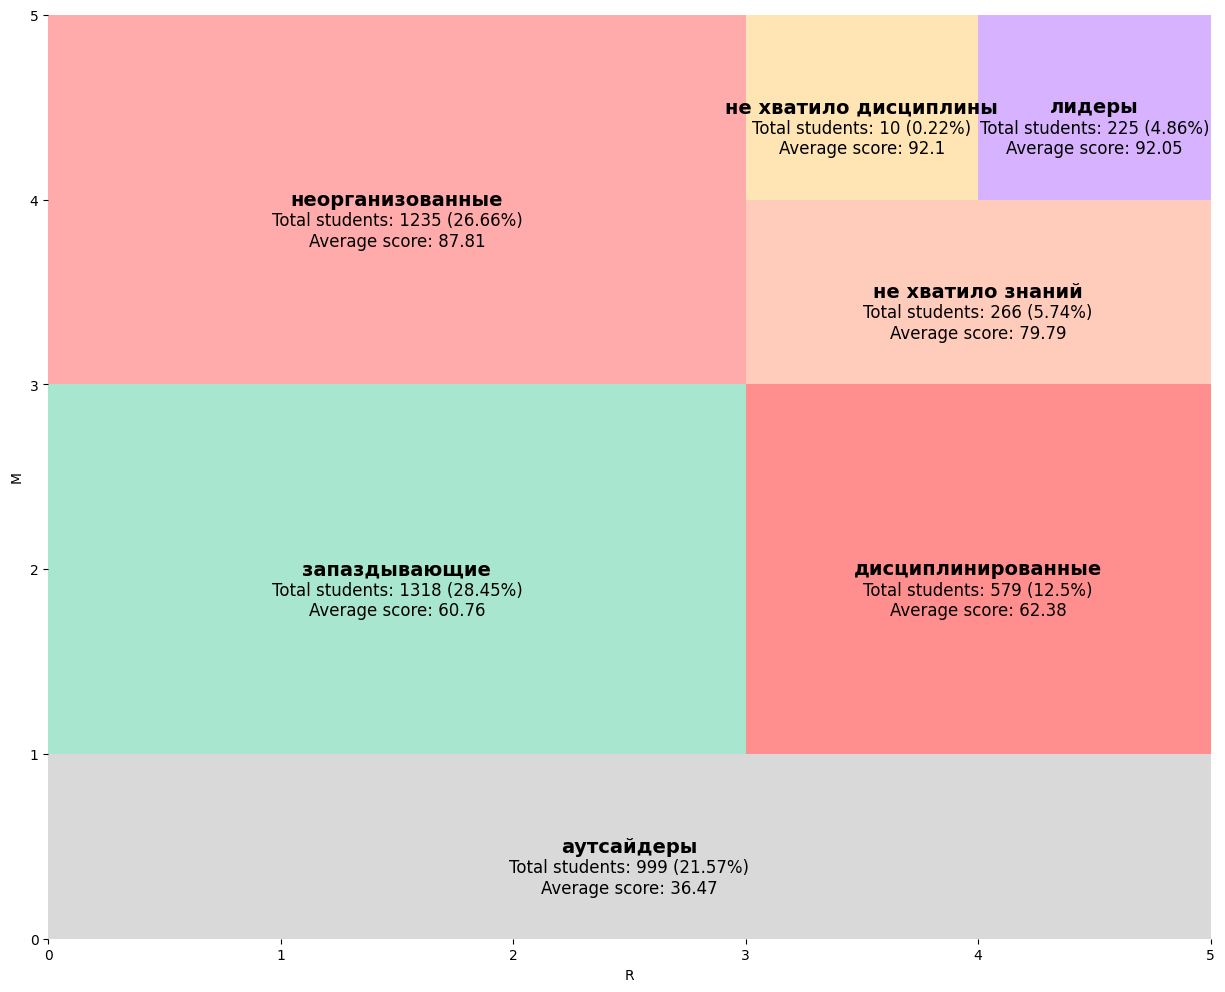

In [46]:
# Создаем словарь для сегментов на основе значений R и M
segt_map = {
    r'[1-3][2-3]': 'запаздывающие',
    r'[3-5][2-3]': 'дисциплинированные',
    r'[1-3][3-5]': 'неорганизованные',
    r'[3-5][3-4]': 'не хватило знаний',
    r'[3-4][4-5]': 'не хватило дисциплины',
    r'[4-5][4-5]': 'лидеры',
    r'[1-5][1]': 'аутсайдеры'
}

# Добавляем сегменты к DataFrame
rfm['Segment'] = rfm['R'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

# Определяем координаты для каждого сегмента
rfm_coordinates = {
    "аутсайдеры": [0, 1, 0, 1],
    "запаздывающие": [1, 3, 0, 0.6],
    "дисциплинированные": [1, 3, 0.6, 1],
    "неорганизованные": [3, 5, 0, 0.6],
    "не хватило знаний": [3, 4, 0.6, 1],
    "не хватило дисциплины": [4, 5, 0.6, 0.8],
    "лидеры": [4, 5, 0.8, 1],
}

# Создаем фигуру для графика
fig, ax = plt.subplots(figsize=(15, 12))

# Настраиваем границы графика
ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

# Устанавливаем пастельные цвета для фона графика
plt.rcParams["axes.facecolor"] = "white"
palette = ["#D9D9D9", "#A8E6CF", "#FF8E8E", "#FFABAB", "#FFCCBC", 
           "#FFE5B4", "#D7B2FF", "#B2EBF2", "#FF9A8D", "#B39DDB"]

# Заполняем график сегментами
for key, color in zip(rfm_coordinates.keys(), palette[:10]):
    
    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]
    
    ax.axhspan(ymin=ymin, ymax=ymax, xmin=xmin, xmax=xmax, facecolor=color)
    
    # Подсчитываем количество пользователей и их средний балл
    users = rfm[rfm.Segment == key].shape[0]
    users_percentage = (users / rfm.shape[0]) * 100
    avg_monetary = rfm[rfm.Segment == key]["score"].mean()
    
    # Формируем тексты для вывода
    user_txt = f"\n\nTotal students: {users} ({round(users_percentage, 2)}%)"
    monetary_txt = f"\n\n\n\nAverage score: {round(avg_monetary, 2)}"
    
    # Определяем координаты для текста
    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2
    
    # Выводим сегмент и текст с информацией о пользователях и среднем балле
    plt.text(x=x, y=y, s=key, ha="center", va="center", fontsize=14, color="black", fontweight="bold")
    plt.text(x=x, y=y, s=user_txt, ha="center", va="center", fontsize=12, color="black")    
    plt.text(x=x, y=y, s=monetary_txt, ha="center", va="center", fontsize=12, color="black")    

# Настраиваем метки осей
ax.set_xlabel("R")
ax.set_ylabel("M")

# Убираем лишние линии
sns.despine(left=True, bottom=True)

# Показываем график
plt.show()


Теперь рассмотрим распределение показателей по оценкам среди студентов:

**Распределение по оценке знаний**:
Студенты распределились примерно равномерно по оценке знаний, что указывает на наличие разнообразия в уровне усвоения материала.

**Показатель дисциплины (R)**:
Четверть студентов сдают задания без опозданий, что говорит о наличии группы ответственных студентов, которые соблюдают сроки.

**Показатель активности (F)**:
Основную часть составляют студенты, обучавшиеся только на одном курсе.  
Это может свидетельствовать о том, что большинство студентов предпочитают сосредотачиваться на одном предмете.



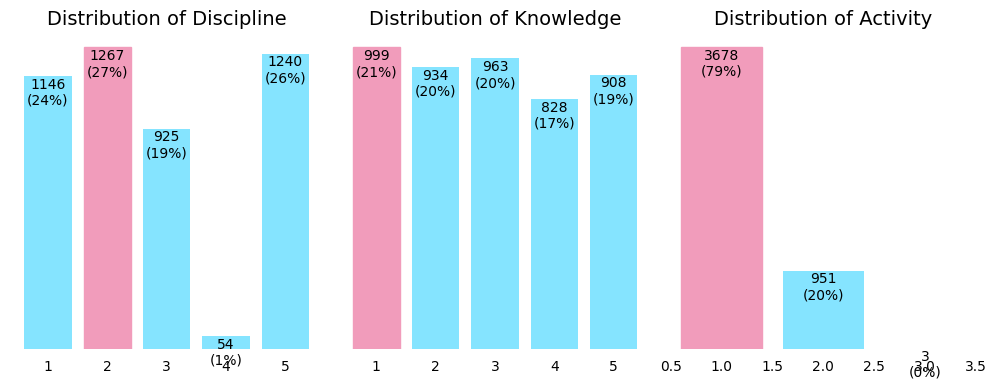

In [47]:
# График распределения пользователей по группам R, M и F
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Определяем параметры для отображения
for i, p in enumerate(['R', 'M', 'F']):
    parameters = {'R': 'Discipline', 'M': 'Knowledge', 'F': 'Activity'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='#85e4ff')  
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]), fontsize=14)
    
    # Добавляем значения на столбцы
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('#f19cbb')  # Цвет для максимального значения
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 2,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
                ha='center',
                va='top',
                color='black')  # Цвет текста

plt.tight_layout()
plt.show()


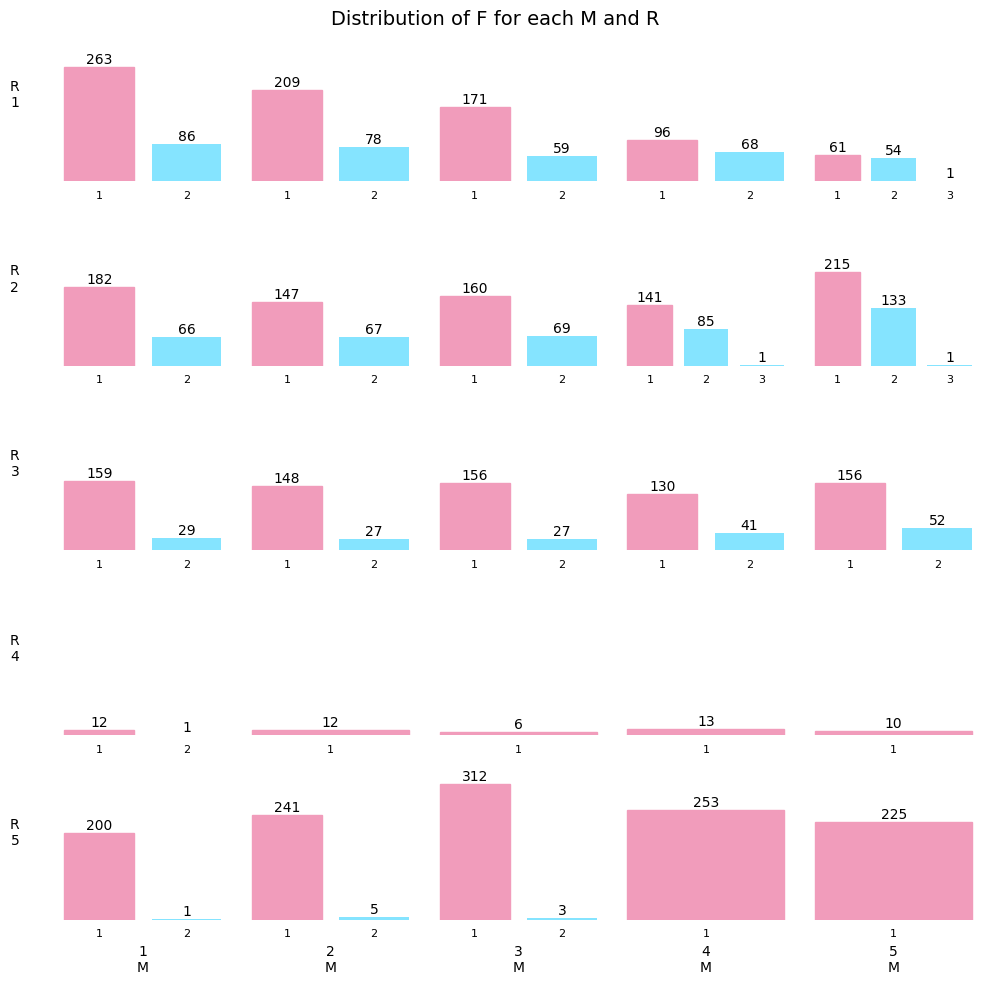

In [48]:
# График распределения по группам F для каждой комбинации R и M
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
m_range = range(1, 6)

for r in r_range:
    for m in m_range:
        y = rfm[(rfm['R'] == r) & (rfm['M'] == m)]['F'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, m - 1]
        bars = ax.bar(x, y, color='#85e4ff')  
        
        if r == 5:
            ax.set_xlabel('{}\nM'.format(m), va='top')
        if m == 1:
            ax.set_ylabel('R\n{}'.format(r), rotation=0, labelpad=30)

        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        # Добавляем значения на столбцы
        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('#f19cbb')  # Цвет для максимального значения
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='black')  # Цвет текста

fig.suptitle('Distribution of F for each M and R', fontsize=14)
plt.tight_layout()
plt.show()


В проекте проделана следующая работа:

* Выполнены задачи, поставленные менеджером Василием и посчитаны необходимые ему показатели.

* Проведен RFM-анализ, который делит студентов на группы и сформирован список "лидеров"(по предметам ССС и DDD), которых можно рекомендовать работодателям.




По итогам проекта можно выделить несколько ключевых рекомендаций:

- Рекомендуется улучшить процесс сбора данных, поскольку часть информации (например, оценки за экзамены) не была включена в таблицы, а некоторые ячейки остались пустыми. 

- Выявлено, что основной причиной незавершения курса является отмена регистрации, а не несдача экзамена или трудности в обучении. В среднем уровень оттока составляет 30%. 